In [224]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [225]:
df = pd.read_csv('Heart_Disease_Prediction.csv')
#df

In [226]:
df_men = df[df['Sex'] == 1]
#df_men
#len(df_men)

In [227]:
df_men_pres = df_men[df_men['Heart Disease'] == 'Presence'].reset_index(drop = True)
#df_men_pres
#len(df_men_pres)

In [228]:
df_men_abs = df_men[df_men['Heart Disease'] == 'Absence'].reset_index(drop = True)
#df_men_abs
#len(df_men_abs)

In [229]:
class LinearRegression():
    def estimate_coef(self, x, y, n):
    # mean of x and y vector
        m_x = np.mean(x)
        m_y = np.mean(y)

    # calculating cross-deviation and deviation about x
        SS_xy = np.sum(y*x) - n*m_y*m_x
        SS_xx = np.sum(x*x) - n*m_x*m_x

    # calculating regression coefficients
        b_1 = SS_xy / SS_xx
        b_0 = m_y - b_1*m_x

        return (b_0, b_1)

    def regression_line(self, x, y, b):
    
    # predicted response vector
        global y_pred 
        y_pred = b[0] + b[1]*x
        
    def main(self, x, y, n):


        b = self.estimate_coef(x, y, n)
        print(self.estimate_coef(x,y,n))
        self.regression_line(x,y,b)

In [230]:
LR_pres_men = LinearRegression()

In [231]:
x = df_men_pres['Age']
y = df_men_pres['Cholesterol']
n =len(df_men_pres.index)

LR_pres_men.main(x,y,n)

(np.float64(190.23022950599054), np.float64(1.0622728496432807))


In [232]:
points_below_line_pres = np.sum(df_men_pres['Cholesterol'] < y_pred)
points_below_line_pres

np.int64(51)

In [245]:
df_men_pres_above = df_men_pres[df_men_pres['Cholesterol'] > y_pred].reset_index(drop = True)
#df_men_pres_above
df_men_pres_below = df_men_pres[df_men_pres['Cholesterol'] < y_pred].reset_index(drop = True)
#df_men_pres_below

In [248]:
df_men_pres_above_group_age_size = df_men_pres_above.groupby(df_men_pres_above['Age']).size().to_frame('Count').reset_index()
#df_men_pres_above_group_age_size
df_men_pres_below_group_age_size = df_men_pres_below.groupby(df_men_pres_below['Age']).size().to_frame('Count').reset_index()
#df_men_pres_below_group_age_size

In [249]:
class plot_chol_size():
    def plot_chol(self, x, y, title):
        plt.scatter(x, y, color = "b", marker = "o", s = 20)
        plt.title(title)
        plt.xlabel(x.name)
        plt.ylabel(y.name)
        plt.xticks(np.arange(x.min(), x.max()+5, step=1))
        plt.rcParams['figure.figsize'] = [20, 10]
        plt.show()
    def main(self, x, y, title):
        plot = self.plot_chol(x,y, title)
        return plot

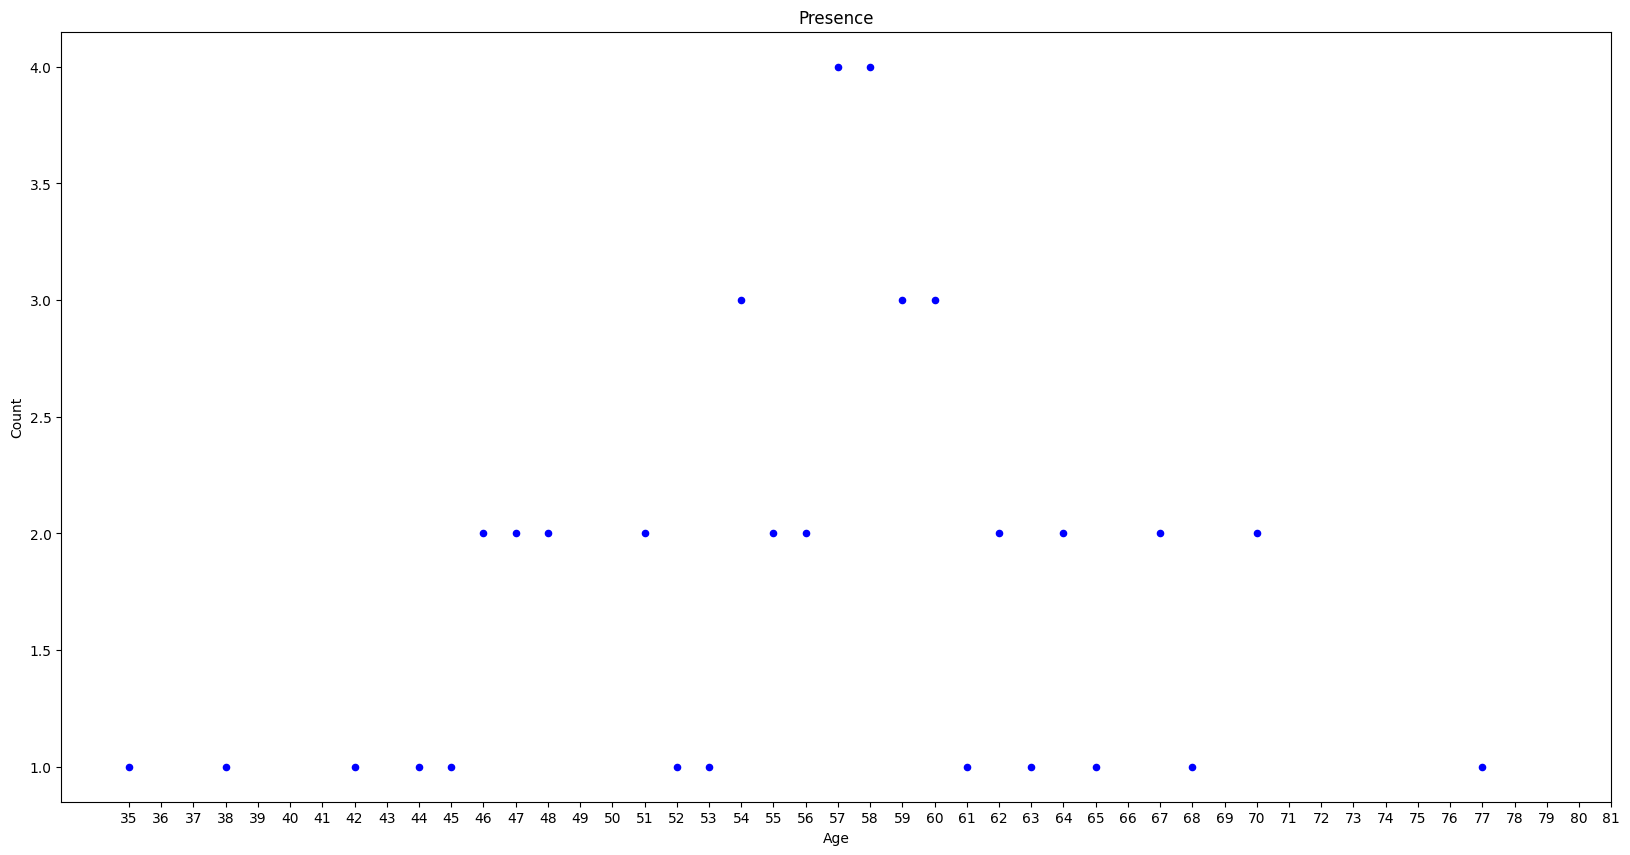

In [250]:
Plot_1 = plot_chol_size()
Plot_1.main(df_men_pres_above_group_age_size['Age'], df_men_pres_above_group_age_size['Count'], df_men_pres['Heart Disease'][0])

In [251]:
df_men_group_age_size = df_men.groupby(df_men['Age']).size().to_frame('Count').reset_index().astype(int)
#df_men_group_age_size

In [252]:
class Probability():
    def __init__(self):
        self.probability_pres = {}
        self.df_prob = []
    def probability(self, x, y):
        for i in range(0, (len(x))):
            for j in range(0, (len(y))):
                if x['Age'][i] == y['Age'][j]:
                    self.probability_pres.update({x['Age'][i]:
                                             x['Count'][i] / y['Count'][j]})
        #return self.probability_pres

    def probability_dataframe(self, x, y):
        self.probability(x,y)
        self.df_prob = pd.DataFrame(list(self.probability_pres.items()), 
                        columns = ['Age', 'Probability'])
        return self.df_prob

In [260]:
Prob_1 = Probability()
df_prob_above_pres = Prob_1.probability_dataframe(df_men_pres_above_group_age_size, df_men_group_age_size)
df_prob_above_pres

,Age,Probability
0,35,0.500000
1,38,1.000000
2,42,0.166667
3,44,0.125000
4,45,0.250000
5,46,0.500000
6,47,0.500000
7,48,0.333333
8,51,0.250000
9,52,0.100000


,Age,Probability
0,35,0.500000
1,38,1.000000
2,42,0.166667
3,44,0.125000
4,45,0.250000
5,46,0.500000
6,47,0.500000
7,48,0.333333
8,51,0.250000
9,52,0.100000


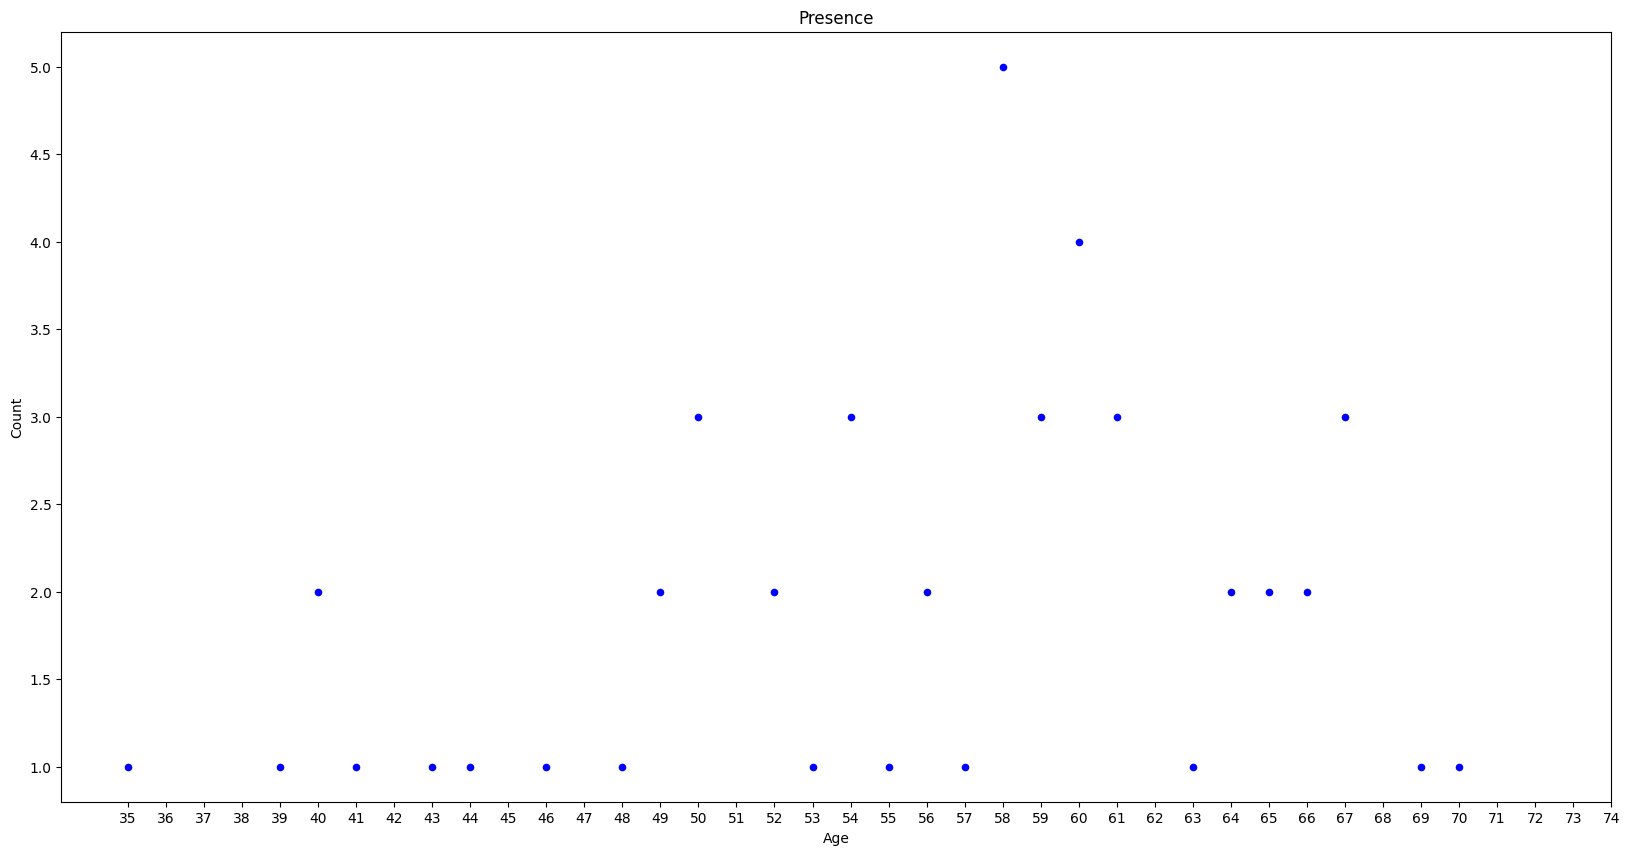

In [258]:
Plot_2 = plot_chol_size()
Plot_2.main(df_men_pres_below_group_age_size['Age'], df_men_pres_below_group_age_size['Count'], df_men_pres['Heart Disease'][0])

In [257]:
Prob_2 = Probability()
Prob_2.probability_dataframe(df_men_pres_below_group_age_size, df_men_group_age_size)

,Age,Probability
0,35,0.500000
1,39,0.500000
2,40,0.666667
3,41,0.200000
4,43,0.200000
5,44,0.125000
6,46,0.250000
7,48,0.166667
8,49,0.666667
9,50,0.750000
